In [9]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

In [10]:
from mod_my_utils.read_write_data import *
from mod_backtest_utils.backtest_ma import MovingAverageCrossStrategy
from mod_backtest_utils.portfolio import MarketOnPricePortfolio

In [11]:
stock_name = "aapl"
folder_name = "data/"
stock_data = get_price_csv(folder_name=folder_name, symbol=stock_name, index_col="Date")

stock name:  aapl


In [12]:
data = stock_data[['Adj. Close']].copy()
data.columns = ['price']
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Read Data

In [5]:
symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [6]:
symbol = symbols[0]
data_source = "yahoo"
# MM/DD/YYYY
start_date = "1/1/2010"
end_date = "1/1/2015"
print(start_date)
print(end_date)
print(symbol)

1/1/2010
1/1/2015
HDFC


In [7]:
stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

TypeError: string indices must be integers

In [ ]:
data = stock_data[["Adj Close"]].copy() 
data.columns = ['price']
data.head()

### MA strategy and portfolio objecs

#### Get object of strategy type

In [13]:
symbol = 'AAPL'
short_window = 80
long_window = 200
signal_window = 60

In [14]:
mac = MovingAverageCrossStrategy(symbol=symbol, bars=data, short_window=short_window, long_window=long_window, signal_window=signal_window)

In [15]:
signals = mac.generate_signals()
signals.tail(10)

,price,buy_sell
Date,,
2017-11-17,170.15,0.0
2017-11-20,169.98,0.0
2017-11-21,173.14,0.0
2017-11-22,174.96,0.0
2017-11-24,174.97,0.0
2017-11-27,174.09,0.0
2017-11-28,173.07,0.0
2017-11-29,169.48,0.0
2017-11-30,171.85,0.0


#### Generate portfolio type object

In [16]:
portfolio = MarketOnPricePortfolio(symbol, signals, initial_capital=100000.0)

In [17]:
portfolio_macd = portfolio.backtest_portfolio()

In [18]:
portfolio_macd.head()

,holdings,cash,total
Date,,,
2007-12-03,0.0,100000.0,100000.0
2007-12-04,0.0,100000.0,100000.0
2007-12-05,0.0,100000.0,100000.0
2007-12-06,0.0,100000.0,100000.0
2007-12-07,0.0,100000.0,100000.0


In [19]:
portfolio_macd.head()

,holdings,cash,total
Date,,,
2007-12-03,0.0,100000.0,100000.0
2007-12-04,0.0,100000.0,100000.0
2007-12-05,0.0,100000.0,100000.0
2007-12-06,0.0,100000.0,100000.0
2007-12-07,0.0,100000.0,100000.0


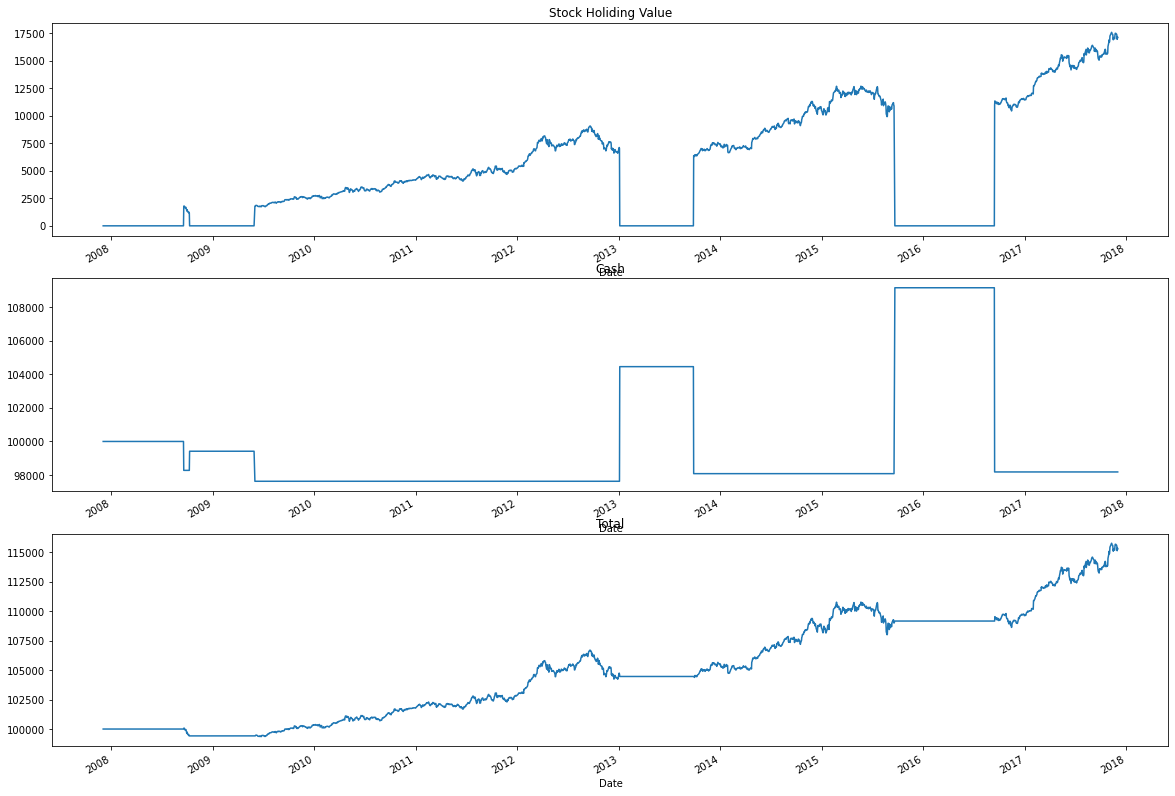

In [21]:
portfolio.plot_stock_portfolio()